# Gravity problem with a RK5 solver : from planets to comets

- Student 1 Name: Ans Imran
- Student 2 Name: Richard Awde
- Student 3 Name: Ahmad Hasan

We re-use the gravity equations like in the previous notebook :

$\frac{dX^2 }{dt^2}=-\frac{GM}{r^2}\times\frac{X}{r}$


$\frac{dY^2 }{dt^2}=-\frac{GM}{r^2}\times\frac{Y}{r}$


The state vector of the system is $U_n=(X_n,Y_n, Vx_n, Vy_n)$

We want to solve this system now using a RK5 adaptive step-size solver. As much as possible re-use functions that you have already coded.


1) Make a code that integrate the motion of a body in orbit around the sun with initial conditions U0=(X0,Y0,Vx0, Vy0), and that uses a 5th order Runge Kutta scheme .

Here are some useful information: For the RK5 the scheme is the following :

$k1=dt*f(y_n)$

$k2=dt*f(y_n+b_{21}k1)$

$k3=dt*f(y_n+b_{31}k1+b_{32}k2)$

$k4=dt*f(y_n+b_{41}k1+b_{42}k2+b_{43}k3)$

...

$k6=dt*f(y_n+b_{61}k1+b_{62}k2+b_{63}k3+b_{64}k4+b_{65}k5)$

and

$y_{n+1}=y_n+c1*k1+c2*k2+...+c6*k6+o(dt^6)$

the coefficients $b_{ij}$ and $c_i$ are i this table :
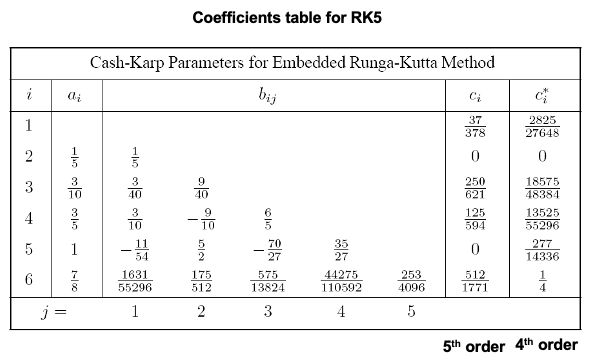








1) Code a program that integrate , with a RK5, the motion of a planet  around the Sun (sun's  mass=$M_s$=2e30 Kg). The planet's semi major axis a = 1 astronomial unit (au). Initally X0=1au, Y0=0au, Vx0=0 and Vy0=$(GM_s/a)^{1/2}$ Integrate the motion of the planet for 100 orbit with a small dt (<< orbital period) that you will choose. Plor energy variation Vs. time




In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#We'll stick with SI units
G       =  6.67e-11
M_moon  =  7.34e22
M_earth =  5.97e24 
M_sun   =  2e30
a       =  (0.1)*(1.5e11)  # 1.5e11 meters = 1 au

def omega(m,r):
    om = np.sqrt((G*m)/r**3)
    return om

def time_period(f,m,r):
    TP = (2*np.pi)/f(m,r)
    return TP




c1=37/378; c2 = 0; c3 = 250/621; c4 = 125/594; c5 = 0; c6 = 512/1771; 


def fx(xn, yn, vxn, vyn):
    output = ( -(G * M_earth)/(xn**2 + yn**2) ) * (xn/np.sqrt(xn**2 + yn**2 ))
    return output

def fy(xn, yn, vxn, vyn):
    output = ( -(G * M_earth)/(xn**2 + yn**2) ) * (yn/np.sqrt(xn**2 + yn**2 ))
    return output


def rk5_solver(time_initial, time_final, step_size, x_initial, y_initial, vx_initial,  vy_initial, x_function, y_function, c1f, c2f, c3f, c4f, c5f, c6f):

    time_array = np.arange(time_initial, time_final, step_size)
    x     = np.squeeze(np.zeros((1,len(time_array))))
    x[0]  = x_initial
    
    y     = np.squeeze(np.zeros((1,len(time_array))))
    y[0]  = y_initial
    
    vx    = np.squeeze(np.zeros((1,len(time_array))))
    vx[0] = vx_initial

    vy    = np.squeeze(np.zeros((1,len(time_array))))
    vy[0] = vy_initial

    
    for i in range( len(time_array) - 1 ):
        
        m1x  = step_size*vx[i]
        m1y  = step_size*vy[i]
        k1x  = step_size*x_function(x[i], y[i], vx[i], vy[i])
        k1y  = step_size*y_function(x[i], y[i], vx[i], vy[i])
        
        
        
        m2x  = step_size*(vx[i] + 0.2*k1x)
        m2y  = step_size*(vy[i] + 0.2*k1y)
        k2x  = step_size*x_function(x[i] + 0.2*m1x,   y[i] + 0.2*m1y,   vx[i] + 0.2*k1x,   vy[i] + 0.2*k1y)
        k2y  = step_size*y_function(x[i] + 0.2*m1x,   y[i] + 0.2*m1y,   vx[i] + 0.2*k1x,   vy[i] + 0.2*k1y)
        
        
        
        m3x  = step_size*(vx[i] + 0.075*k1x + 0.225*k2x)
        m3y  = step_size*(vy[i] + 0.075*k1y + 0.225*k2y)
        k3x  = step_size*x_function(x[i]    + 0.075*m1x + 0.225*m2x,   y[i] + 0.075*m1y + 0.225*m2y,   vx[i] + 0.075*k1x + 0.225*k2x,   vy[i] + 0.075*k1y + 0.225*k2y)
        k3y  = step_size*y_function(x[i]    + 0.075*m1x + 0.225*m2x,   y[i] + 0.075*m1y + 0.225*m2y,   vx[i] + 0.075*k1x + 0.225*k2x,   vy[i] + 0.075*k1y + 0.225*k2y)
        
        
        
        m4x  = step_size*(vx[i] + 0.3*k1x - 0.9*k2x + 1.2*k3x)
        m4y  = step_size*(vy[i] + 0.3*k1y - 0.9*k2y + 1.2*k3y)
        k4x  = step_size*x_function(x[i]  + 0.3*m1x - 0.9*m2x + 1.2*m3x,   y[i] + 0.3*m1y - 0.9*m2y + 1.2*m3y,   vx[i] + 0.3*k1x - 0.9*k2x + 1.2*k3x,   vy[i] + 0.3*k1y - 0.9*k2y + 1.2*k3y)
        k4y  = step_size*y_function(x[i]  + 0.3*m1x - 0.9*m2x + 1.2*m3x,   y[i] + 0.3*m1y - 0.9*m2y + 1.2*m3y,   vx[i] + 0.3*k1x - 0.9*k2x + 1.2*k3x,   vy[i] + 0.3*k1y - 0.9*k2y + 1.2*k3y)
        
        
        
        m5x  = step_size*(vx[i] - (11/54)*k1x + 2.5*k2x - (70/27)*k3x + (35/27)*k4x)
        m5y  = step_size*(vy[i] - (11/54)*k1y + 2.5*k2y - (70/27)*k3y + (35/27)*k4y)
        k5x  = step_size*x_function(x[i] - (11/54)*m1x + 2.5*m2x - (70/27)*m3x + (35/27)*m4x,   y[i] - (11/54)*m1y + 2.5*m2y - (70/27)*m3y + (35/27)*m4y,   vx[i] - (11/54)*k1x + 2.5*k2x - (70/27)*k3x + (35/27)*k4x,   vy[i] - (11/54)*k1y + 2.5*k2y - (70/27)*k3y + (35/27)*k4y)
        k5y  = step_size*y_function(x[i] - (11/54)*m1x + 2.5*m2x - (70/27)*m3x + (35/27)*m4x,   y[i] - (11/54)*m1y + 2.5*m2y - (70/27)*m3y + (35/27)*m4y,   vx[i] - (11/54)*k1x + 2.5*k2x - (70/27)*k3x + (35/27)*k4x,   vy[i] - (11/54)*k1y + 2.5*k2y - (70/27)*k3y + (35/27)*k4y)


        
        m6x  = step_size*(vx[i] + (1631/55296)*k1x + (175/512)*k2x + (575/13824)*k3x + (44275/110592)*k4x + (253/4096)*k5x)
        m6y  = step_size*(vy[i] + (1631/55296)*k1y + (175/512)*k2y + (575/13824)*k3y + (44275/110592)*k4y + (253/4096)*k5y)
        k6x  = step_size*x_function(x[i] + (1631/55296)*m1x + (175/512)*m2x + (575/13824)*m3x + (44275/110592)*m4x + (253/4096)*m5x,   y[i] + (1631/55296)*m1y + (175/512)*m2y + (575/13824)*m3y + (44275/110592)*m4y + (253/4096)*m5y,   vx[i] + (1631/55296)*k1x + (175/512)*k2x + (575/13824)*k3x + (44275/110592)*k4x + (253/4096)*k5x,   vy[i] + (1631/55296)*k1y + (175/512)*k2y + (575/13824)*k3y + (44275/110592)*k4y + (253/4096)*k5y)
        k6y  = step_size*y_function(x[i] + (1631/55296)*m1x + (175/512)*m2x + (575/13824)*m3x + (44275/110592)*m4x + (253/4096)*m5x,   y[i] + (1631/55296)*m1y + (175/512)*m2y + (575/13824)*m3y + (44275/110592)*m4y + (253/4096)*m5y,   vx[i] + (1631/55296)*k1x + (175/512)*k2x + (575/13824)*k3x + (44275/110592)*k4x + (253/4096)*k5x,   vy[i] + (1631/55296)*k1y + (175/512)*k2y + (575/13824)*k3y + (44275/110592)*k4y + (253/4096)*k5y)
        
        
        
        x[i+1]  =  x[i]  + c1f*m1x + c2f*m2x + c3f*m3x + c4f*m4x + c5f*m5x + c6f*m6x 

        y[i+1]  =  y[i]  + c1f*m1y + c2f*m2y + c3f*m3y + c4f*m4y + c5f*m5y + c6f*m6y

        
        vx[i+1] =  vx[i] + c1f*k1x + c2f*k2x + c3f*k3x + c4f*k4x + c5f*k5x + c6f*k6x
        
        vy[i+1] =  vy[i] + c1f*k1y + c2f*k2y + c3f*k3y + c4f*k4y + c5f*k5y + c6f*k6y

        
    return time_array, x, y, vx, vy


### we will decrease the initial y velocity, otherwise the plot would be a straight line, i.e. the body will be forever travelling in an almost straight line, (most probably) because of the numerical errors/losses


#### The code could take some time to run

The value of Total energy is oscillating
The maximum value of total energy is: -5.280455099999415e+34
The minimum value of total energy is: -2.641118171871223e+35
Since they are almost of the same order of magnitude, therefore we say that RK5 metod is doing fine for this problem


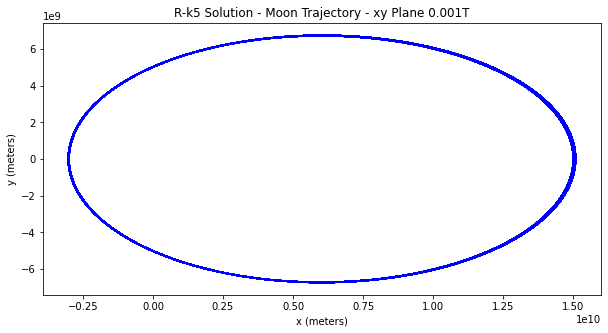

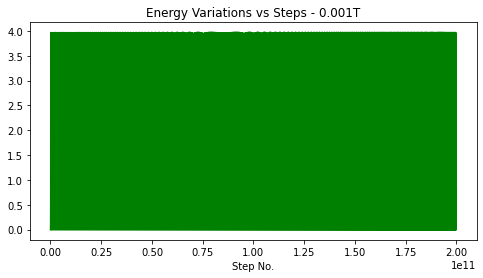

In [2]:
#Calculating Trajectory
T = 100*time_period(omega,M_earth,a)  #since mass of the planet is not given we are taking it to be M_earth, and 1 au is earth's distance from sun

x0  = a
vx0 = 0

y0  = 0
vy0 = 0.001*np.sqrt((G*M_sun)/a)          # we had to decrease the initial y velocity, otherwise the plot was linear,
                                          # meaning that the body was forever travelling in an almost straight line

t0 = 0
tf = 2e11 # 100*T is roughly equal to 2e11 seconds for earth 

h = 2e6  # 0.001T is roughly equal to 2e6


def E_total(x,y,vx,vy):
    total_E = 0.5 * M_earth * ((vx**2) + (vy**2)) - ((G * M_sun * M_earth)/(np.sqrt( (x**2) + (y**2) )))
    return total_E



t_array, px, py, x_vel, y_vel = rk5_solver(t0, tf, h, x0, y0, vx0, vy0, fx, fy, c1, c2, c3, c4, c5, c6)



#plotting the trajectory of moon
plt.figure(figsize=(10,5))
plt.plot(px, py, 'b')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('R-k5 Solution - Moon Trajectory - xy Plane 0.001T')
plt.show


#calculating and plotting energy variations

total_energy = E_total(px, py, x_vel, y_vel)

variations = (abs(total_energy) - abs(total_energy[0]))/abs(total_energy[0])

plt.figure(figsize=(8,4))
plt.plot(t_array, variations, 'g', label = 'Energy Variation')
plt.xlabel('Step No.')
plt.title('Energy Variations vs Steps - 0.001T')
plt.show

print(f"The value of Total energy is oscillating")
print(f"The maximum value of total energy is: {max(total_energy)}")
print(f"The minimum value of total energy is: {min(total_energy)}")
print(f"Since they are almost of the same order of magnitude, therefore we say that RK5 metod is doing fine for this problem")


2) Re-using the same code, redo the same but using a 4th order integrator, using coefficients $c_i^*$ in the above table. plot the enrgy variation Vs. time and compare to the 5th order case

### we can use the same rk5 solver, we just have to replace c1,..c6 BY c1*,...c6*

#### The code could take some time to run

The value of Total energy is oscillating
The maximum value of total energy is: -5.279833901832682e+34
The minimum value of total energy is: -2.641256696930485e+35
Since they are almost of the same order of magnitude, therefore we say that 4th order integrator is ALSO doing fine for this problem


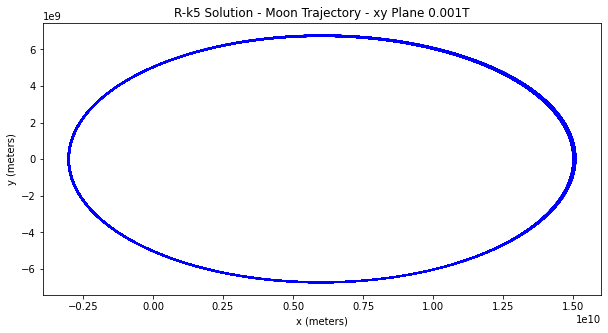

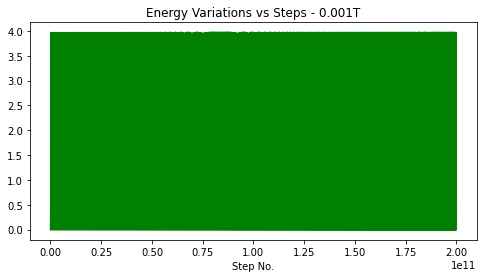

In [3]:
c1s=2825/27648; c2s = 0; c3s = 18575/48384; c4s = 13525/55296; c5s = 277/14336; c6s = 1/4;


#Calculating Trajectory
x0  = a
vx0 = 0

y0  = 0
vy0 = 0.001*np.sqrt((G*M_sun)/a)          # we had to decrease the initial y velocity, otherwise the plot was linear,
                                          # meaning that the body was forever travelling in an almost straight line

t0 = 0
tf = 2e11 # 100*T is roughly equal to 2e11 seconds for earth 

h = 2e6  # 0.001T is roughly equal to 2e6


t_array, px, py, x_vel, y_vel = rk5_solver(t0, tf, h, x0, y0, vx0, vy0, fx, fy, c1s, c2s, c3s, c4s, c5s, c6s)



#plotting the trajectory of moon
plt.figure(figsize=(10,5))
plt.plot(px, py, 'b')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('R-k5 Solution - Moon Trajectory - xy Plane 0.001T')
plt.show


#calculating and plotting energy variations

total_energy = E_total(px, py, x_vel, y_vel)

variations = (abs(total_energy) - abs(total_energy[0]))/abs(total_energy[0])

plt.figure(figsize=(8,4))
plt.plot(t_array, variations, 'g', label = 'Energy Variation')
plt.xlabel('Step No.')
plt.title('Energy Variations vs Steps - 0.001T')
plt.show

print(f"The value of Total energy is oscillating")
print(f"The maximum value of total energy is: {max(total_energy)}")
print(f"The minimum value of total energy is: {min(total_energy)}")
print(f"Since they are almost of the same order of magnitude, therefore we say that 4th order integrator is ALSO doing fine for this problem")


3)Now we will go to adaptibe method.
We must define an error function. We will use the following error estimator :
$\Delta=ABS(E_{n+1}-E_n)/E_n $ Where E_n is the mechanical energy at time n

make a function that comput Delta using $U_n+1$ and $U_n$ as inputs.

In [5]:
def delta(xnp, ynp, vxnp, vynp, xn, yn, vxn, vyn):
    
    Enp = E_total(xnp, ynp, vxnp, vynp)
    En  = E_total(xn, yn, vxn, vyn)
    
    variation = abs((abs(Enp) - abs(En))/abs(En))
    
    return variation


4) We want Delta to be always smaller or equal to $\Delta0$=1.e-4. We will assume that $\Delta$ is proportional to $dt^5$ : compute the new value of dt as a function $\Delta$ , $\Delta0$, dt

In [6]:
delta_0 = 1e-4


def step_controller(xnp, ynp, vxnp, vynp, xn, yn, vxn, vyn, delta_0, step_size):
    switch_f = 0
    
    delta_0 = 1e-4
    if delta(xnp, ynp, vxnp, vynp, xn, yn, vxn, vyn) > delta_0:
        step_size = step_size * ((delta_0/delta(xnp, ynp, vxnp, vynp, xn, yn, vxn, vyn))**0.2) * 0.2  #0.2 gives a complete orbit for our case
        switch_f = 1
        
    return step_size, switch_f


5) Make an adaptive step-size RK5 code.  Note : you will keep in memory dt for every time step

In [7]:
c1=37/378; c2 = 0; c3 = 250/621; c4 = 125/594; c5 = 0; c6 = 512/1771; 


def adaptive_rk5_solver(time_initial, time_final, original_step_size, x_initial, y_initial, vx_initial,  vy_initial, x_function, y_function, c1f, c2f, c3f, c4f, c5f, c6f, c1fs, c2fs, c3fs, c4fs, c5fs, c6fs):
    
    time_array = np.arange(time_initial, time_final, original_step_size)

    x      = np.squeeze(np.zeros((1,len(time_array))))
    x[0]   = x_initial    
    y      = np.squeeze(np.zeros((1,len(time_array))))
    y[0]   = y_initial
    vx     = np.squeeze(np.zeros((1,len(time_array))))
    vx[0]  = vx_initial
    vy     = np.squeeze(np.zeros((1,len(time_array))))
    vy[0]  = vy_initial

    xs     = np.squeeze(np.zeros((1,len(time_array))))
    xs[0]  = x_initial    
    ys     = np.squeeze(np.zeros((1,len(time_array))))
    ys[0]  = y_initial
    vxs    = np.squeeze(np.zeros((1,len(time_array))))
    vxs[0] = vx_initial
    vys    = np.squeeze(np.zeros((1,len(time_array))))
    vys[0] = vy_initial

    
    step_size     = original_step_size
    i             = -1
    step_array    = np.squeeze(np.zeros((1,len(time_array))))
    step_array[0] = step_size
    
    while i < len(time_array) - 2 :
        
        i = i + 1
        
        m1x  = step_size*vx[i]
        m1y  = step_size*vy[i]
        k1x  = step_size*x_function(x[i], y[i], vx[i], vy[i])
        k1y  = step_size*y_function(x[i], y[i], vx[i], vy[i])
        
        
        
        m2x  = step_size*(vx[i] + 0.2*k1x)
        m2y  = step_size*(vy[i] + 0.2*k1y)
        k2x  = step_size*x_function(x[i] + 0.2*m1x,   y[i] + 0.2*m1y,   vx[i] + 0.2*k1x,   vy[i] + 0.2*k1y)
        k2y  = step_size*y_function(x[i] + 0.2*m1x,   y[i] + 0.2*m1y,   vx[i] + 0.2*k1x,   vy[i] + 0.2*k1y)
        
        
        
        m3x  = step_size*(vx[i] + 0.075*k1x + 0.225*k2x)
        m3y  = step_size*(vy[i] + 0.075*k1y + 0.225*k2y)
        k3x  = step_size*x_function(x[i]    + 0.075*m1x + 0.225*m2x,   y[i] + 0.075*m1y + 0.225*m2y,   vx[i] + 0.075*k1x + 0.225*k2x,   vy[i] + 0.075*k1y + 0.225*k2y)
        k3y  = step_size*y_function(x[i]    + 0.075*m1x + 0.225*m2x,   y[i] + 0.075*m1y + 0.225*m2y,   vx[i] + 0.075*k1x + 0.225*k2x,   vy[i] + 0.075*k1y + 0.225*k2y)
        
        
        
        m4x  = step_size*(vx[i] + 0.3*k1x - 0.9*k2x + 1.2*k3x)
        m4y  = step_size*(vy[i] + 0.3*k1y - 0.9*k2y + 1.2*k3y)
        k4x  = step_size*x_function(x[i]  + 0.3*m1x - 0.9*m2x + 1.2*m3x,   y[i] + 0.3*m1y - 0.9*m2y + 1.2*m3y,   vx[i] + 0.3*k1x - 0.9*k2x + 1.2*k3x,   vy[i] + 0.3*k1y - 0.9*k2y + 1.2*k3y)
        k4y  = step_size*y_function(x[i]  + 0.3*m1x - 0.9*m2x + 1.2*m3x,   y[i] + 0.3*m1y - 0.9*m2y + 1.2*m3y,   vx[i] + 0.3*k1x - 0.9*k2x + 1.2*k3x,   vy[i] + 0.3*k1y - 0.9*k2y + 1.2*k3y)
        
        
        
        m5x  = step_size*(vx[i] - (11/54)*k1x + 2.5*k2x - (70/27)*k3x + (35/27)*k4x)
        m5y  = step_size*(vy[i] - (11/54)*k1y + 2.5*k2y - (70/27)*k3y + (35/27)*k4y)
        k5x  = step_size*x_function(x[i] - (11/54)*m1x + 2.5*m2x - (70/27)*m3x + (35/27)*m4x,   y[i] - (11/54)*m1y + 2.5*m2y - (70/27)*m3y + (35/27)*m4y,   vx[i] - (11/54)*k1x + 2.5*k2x - (70/27)*k3x + (35/27)*k4x,   vy[i] - (11/54)*k1y + 2.5*k2y - (70/27)*k3y + (35/27)*k4y)
        k5y  = step_size*y_function(x[i] - (11/54)*m1x + 2.5*m2x - (70/27)*m3x + (35/27)*m4x,   y[i] - (11/54)*m1y + 2.5*m2y - (70/27)*m3y + (35/27)*m4y,   vx[i] - (11/54)*k1x + 2.5*k2x - (70/27)*k3x + (35/27)*k4x,   vy[i] - (11/54)*k1y + 2.5*k2y - (70/27)*k3y + (35/27)*k4y)


        
        m6x  = step_size*(vx[i] + (1631/55296)*k1x + (175/512)*k2x + (575/13824)*k3x + (44275/110592)*k4x + (253/4096)*k5x)
        m6y  = step_size*(vy[i] + (1631/55296)*k1y + (175/512)*k2y + (575/13824)*k3y + (44275/110592)*k4y + (253/4096)*k5y)
        k6x  = step_size*x_function(x[i] + (1631/55296)*m1x + (175/512)*m2x + (575/13824)*m3x + (44275/110592)*m4x + (253/4096)*m5x,   y[i] + (1631/55296)*m1y + (175/512)*m2y + (575/13824)*m3y + (44275/110592)*m4y + (253/4096)*m5y,   vx[i] + (1631/55296)*k1x + (175/512)*k2x + (575/13824)*k3x + (44275/110592)*k4x + (253/4096)*k5x,   vy[i] + (1631/55296)*k1y + (175/512)*k2y + (575/13824)*k3y + (44275/110592)*k4y + (253/4096)*k5y)
        k6y  = step_size*y_function(x[i] + (1631/55296)*m1x + (175/512)*m2x + (575/13824)*m3x + (44275/110592)*m4x + (253/4096)*m5x,   y[i] + (1631/55296)*m1y + (175/512)*m2y + (575/13824)*m3y + (44275/110592)*m4y + (253/4096)*m5y,   vx[i] + (1631/55296)*k1x + (175/512)*k2x + (575/13824)*k3x + (44275/110592)*k4x + (253/4096)*k5x,   vy[i] + (1631/55296)*k1y + (175/512)*k2y + (575/13824)*k3y + (44275/110592)*k4y + (253/4096)*k5y)
        
        
        
        x[i+1]  =  x[i]  + c1f*m1x + c2f*m2x + c3f*m3x + c4f*m4x + c5f*m5x + c6f*m6x 
        y[i+1]  =  y[i]  + c1f*m1y + c2f*m2y + c3f*m3y + c4f*m4y + c5f*m5y + c6f*m6y
        vx[i+1] =  vx[i] + c1f*k1x + c2f*k2x + c3f*k3x + c4f*k4x + c5f*k5x + c6f*k6x
        vy[i+1] =  vy[i] + c1f*k1y + c2f*k2y + c3f*k3y + c4f*k4y + c5f*k5y + c6f*k6y
        
        
        xs[i+1]  =  xs[i]  + c1fs*m1x + c2fs*m2x + c3fs*m3x + c4fs*m4x + c5fs*m5x + c6fs*m6x 
        ys[i+1]  =  ys[i]  + c1fs*m1y + c2fs*m2y + c3fs*m3y + c4fs*m4y + c5fs*m5y + c6fs*m6y
        vxs[i+1] =  vxs[i] + c1fs*k1x + c2fs*k2x + c3fs*k3x + c4fs*k4x + c5fs*k5x + c6fs*k6x
        vys[i+1] =  vys[i] + c1fs*k1y + c2fs*k2y + c3fs*k3y + c4fs*k4y + c5fs*k5y + c6fs*k6y
        
        
        
        step_size, switch = step_controller(x[i+1], y[i+1], vx[i+1], vy[i+1], x[i], y[i], vx[i], vy[i], delta_0, step_size)
        
        if switch == 1:
            i = i - 1
        else:
            step_size = original_step_size
        
        step_array[i + 1] = step_size
        

        
    return time_array, x, y, vx, vy, step_array


6)Recompute the orbit of the Earth, but now for the initial condition we will use Vx0=0.01*Vy0
plot trajectory and energy for 100 orbits.


The value of Total energy is oscillating
The maximum value of total energy is: -5.309317345340001e+34
The minimum value of total energy is: -2.626249544908922e+35


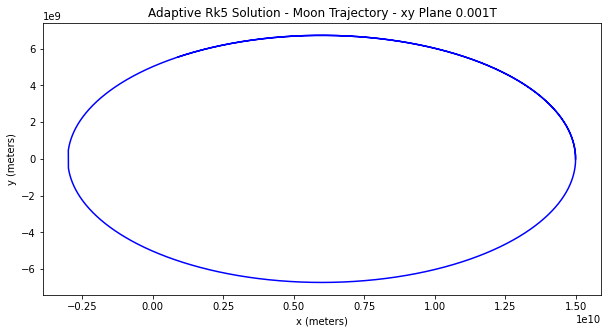

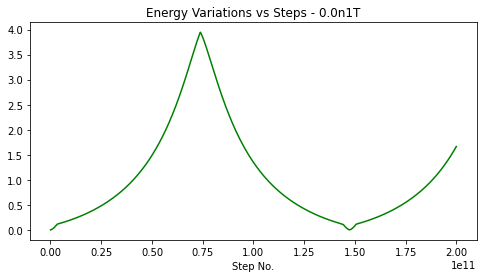

In [8]:
#Calculating Trajectory
x0  = a
vx0 = 0

y0  = 0
vy0 = 0.001*np.sqrt((G*M_sun)/a)          # we had to decrease the initial y velocity, otherwise the plot was linear,
                                          # meaning that the body was forever travelling in an almost straight line

t0 = 0
tf = 2e11 # 100*T is roughly equal to 2e11 seconds for earth 

h = 2e6  # 0.001T is roughly equal to 2e6


def E_total(x,y,vx,vy):
    total_E = 0.5 * M_earth * ((vx**2) + (vy**2)) - ((G * M_sun * M_earth)/(np.sqrt( (x**2) + (y**2) )))
    return total_E



t_array, pxa, pya, x_vela, y_vela, s_array = adaptive_rk5_solver(t0, tf, h, x0, y0, vx0, vy0, fx, fy, c1, c2, c3, c4, c5, c6, c1s, c2s, c3s, c4s, c5s, c6s)



#plotting the trajectory of moon
plt.figure(figsize=(10,5))
plt.plot(pxa, pya, 'b')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('Adaptive Rk5 Solution - Moon Trajectory - xy Plane 0.001T')
plt.show


#calculating and plotting energy variations

total_energy = E_total(pxa, pya, x_vela, y_vela)

variations = (abs(total_energy) - abs(total_energy[0]))/abs(total_energy[0])

plt.figure(figsize=(8,4))
plt.plot(t_array, variations, 'g', label = 'Energy Variation')
plt.xlabel('Step No.')
plt.title('Energy Variations vs Steps - 0.0n1T')
plt.show

print(f"The value of Total energy is oscillating")
print(f"The maximum value of total energy is: {max(total_energy)}")
print(f"The minimum value of total energy is: {min(total_energy)}")


### Unlike other solvers, the energy variations are very smooth in this Case

7) plot the time step as a function of time


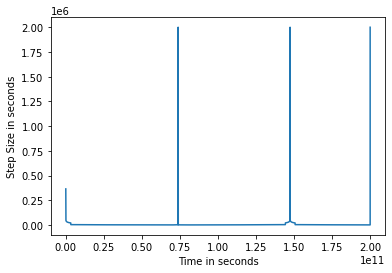

In [9]:
plt.plot(t_array, s_array)
plt.xlabel('Time in seconds')
plt.ylabel('Step Size in seconds')
plt.show()


8) Redo the same for Vx0=0.1*Vy0. Plot trajectory, energy variation and dt Vs. time.

The value of Total energy is oscillating
The maximum value of total energy is: -5.295992807870416e+34
The minimum value of total energy is: -2.627430936013609e+35


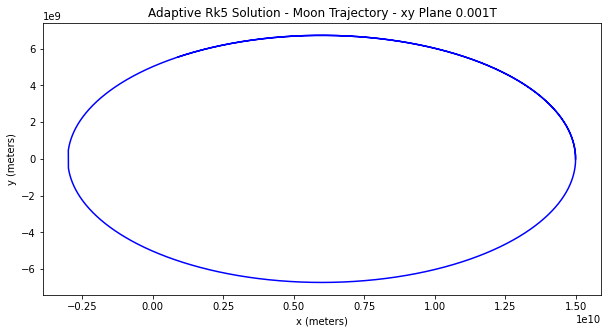

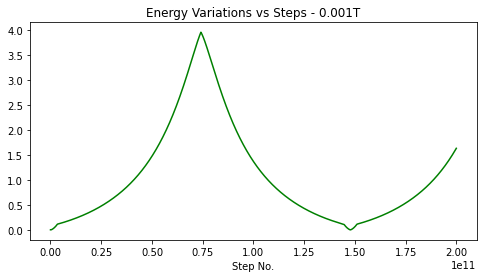

In [10]:
#Calculating Trajectory
x0  = a


y0  = 0
vy0 = 0.001*np.sqrt((G*M_sun)/a)          # we had to decrease the initial y velocity, otherwise the plot was linear,
                                          # meaning that the body was forever travelling in an almost straight line
vx0 = 0.1*vy0

t0 = 0
tf = 2e11 # 100*T is roughly equal to 2e11 seconds for earth 

h = 2e6  # 0.001T is roughly equal to 2e6


def E_total(x,y,vx,vy):
    total_E = 0.5 * M_earth * ((vx**2) + (vy**2)) - ((G * M_sun * M_earth)/(np.sqrt( (x**2) + (y**2) )))
    return total_E



t_array, pxn, pyn, x_velan, y_velan, s_arrayn = adaptive_rk5_solver(t0, tf, h, x0, y0, vx0, vy0, fx, fy, c1, c2, c3, c4, c5, c6, c1s, c2s, c3s, c4s, c5s, c6s)



#plotting the trajectory of moon
plt.figure(figsize=(10,5))
plt.plot(pxa, pya, 'b')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('Adaptive Rk5 Solution - Moon Trajectory - xy Plane 0.001T')
plt.show


#calculating and plotting energy variations

total_energy = E_total(pxn, pyn, x_velan, y_velan)

variations = (abs(total_energy) - abs(total_energy[0]))/abs(total_energy[0])

plt.figure(figsize=(8,4))
plt.plot(t_array, variations, 'g', label = 'Energy Variation')
plt.xlabel('Step No.')
plt.title('Energy Variations vs Steps - 0.001T')
plt.show

print(f"The value of Total energy is oscillating")
print(f"The maximum value of total energy is: {max(total_energy)}")
print(f"The minimum value of total energy is: {min(total_energy)}")


In [218]:
# Results are very similar to the last case

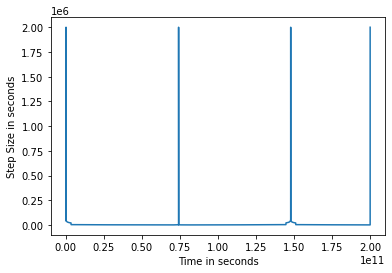

In [11]:
plt.plot(t_array, s_arrayn)
plt.xlabel('Time in seconds')
plt.ylabel('Step Size in seconds')
plt.show()
